In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import preprocessing
from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.models import Sequential
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

In [2]:
data_path = '../input/braintumor/data/train/'
valid_path = '../input/braintumor/data/validation'

In [3]:
train_data = ImageDataGenerator(rescale=1.0/255.0, shear_range=0.2,
                                zoom_range=0.2, horizontal_flip=True)

In [4]:
generator = train_data.flow_from_directory(data_path,
                                           target_size=(224, 224),
                                           color_mode='rgb',
                                           batch_size=32,
                                           class_mode='categorical',
                                           shuffle=True)

valid_generator = train_data.flow_from_directory(valid_path,
                                           target_size=(224, 224),
                                           color_mode='rgb',
                                           batch_size=32,
                                           class_mode='categorical',
                                           shuffle=True)

Found 471 images belonging to 2 classes.
Found 38 images belonging to 2 classes.


In [5]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=2, activation='sigmoid'))


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 93312)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               11944064  
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 2

In [6]:
model.compile(optimizer='Adam', loss='binary_crossentropy',
                 metrics=['accuracy'])

In [7]:
step_size = generator.n // generator.batch_size
valid_step_size = valid_generator.n // valid_generator.batch_size

hist = model.fit_generator(generator,
                              steps_per_epoch=step_size,
                              epochs=50,
                              validation_data=valid_generator,
                              validation_steps=valid_step_size)

Epoch 1/50
14/14 [==============================] - 7s 521ms/step - loss: 0.9601 - accuracy: 0.6811 - val_loss: 0.5928 - val_accuracy: 0.6875
Epoch 2/50
14/14 [==============================] - 7s 481ms/step - loss: 0.5598 - accuracy: 0.7449 - val_loss: 0.4620 - val_accuracy: 0.7500
Epoch 3/50
14/14 [==============================] - 6s 418ms/step - loss: 0.5429 - accuracy: 0.7221 - val_loss: 0.5391 - val_accuracy: 0.7500
Epoch 4/50
14/14 [==============================] - 6s 451ms/step - loss: 0.4640 - accuracy: 0.7973 - val_loss: 0.4365 - val_accuracy: 0.8125
Epoch 5/50
14/14 [==============================] - 7s 485ms/step - loss: 0.4534 - accuracy: 0.7950 - val_loss: 0.3288 - val_accuracy: 0.9375
Epoch 6/50
14/14 [==============================] - 6s 444ms/step - loss: 0.4380 - accuracy: 0.7973 - val_loss: 0.3677 - val_accuracy: 0.8750
Epoch 7/50
14/14 [==============================] - 6s 462ms/step - loss: 0.4016 - accuracy: 0.8314 - val_loss: 0.1957 - val_accuracy: 0.9375
Epoch 

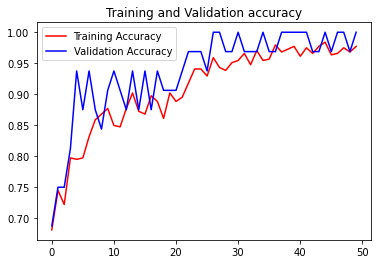

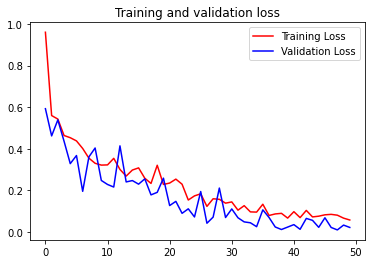

In [8]:
accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [9]:
model.save('/kaggle/working/model.h5')